## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [215]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import urllib.request
import bootcampviztools as bt
import funciones as fs
import seaborn as sns

## Datos

In [216]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/train.csv", index_col= 0)
df.index.name = None

## Exploración de los datos

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [218]:
# ANALISIS VISUAL INDIVIDUAL para detectar fallos de entrada como por ejemplo espacios es blanco que diferencie producto iguales:

In [219]:
df.Company.value_counts().sort_index()

Company
Acer          74
Apple         17
Asus         121
Chuwi          2
Dell         197
Fujitsu        2
Google         2
HP           194
Huawei         2
LG             1
Lenovo       202
MSI           37
Mediacom       6
Microsoft      5
Razer          6
Samsung        5
Toshiba       34
Vero           2
Xiaomi         3
Name: count, dtype: int64

In [220]:
df.ScreenResolution.value_counts().sort_index()

ScreenResolution
1366x768                                         211
1440x900                                           4
1600x900                                          14
1920x1080                                          2
2560x1440                                          1
4K Ultra HD / Touchscreen 3840x2160                7
4K Ultra HD 3840x2160                              3
Full HD / Touchscreen 1920x1080                   30
Full HD 1920x1080                                349
IPS Panel 1366x768                                 4
IPS Panel 2560x1440                                3
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     10
IPS Panel 4K Ultra HD 3840x2160                    5
IPS Panel Full HD / Touchscreen 1920x1080         32
IPS Panel Full HD 1920x1080                      163
IPS Panel Full HD 1920x1200                        1
IPS Panel Full HD 2160x1440                        2
IPS Panel Full HD 2560x1440                        1
IPS Panel Quad HD+ / Touchscr

In [221]:
# ScreenResolucion contine informacion de si la pantalla es Tactil (Touchscreen) y el tamaño de la pantalla. 

# Función para detectar si es Touchscreen
def es_touchscreen(x):
    return 'Touchscreen' in x

# Crear columna Touchscreen
df['Touchscreen'] = df['ScreenResolution'].apply(es_touchscreen)

# Función para extraer solo la resolución de pantalla
def extract_resolution(x):
    if 'Touchscreen' in x:
        return x.split(' / ')[-1]
    else:
        return x

# Crear columna con solo la resolución de pantalla
df['ScreenResolution'] = df['ScreenResolution'].apply(extract_resolution)



In [222]:
df["Cpu"].sort_values().unique().tolist()



['AMD A10-Series 9600P 2.4GHz',
 'AMD A10-Series 9620P 2.5GHz',
 'AMD A10-Series A10-9620P 2.5GHz',
 'AMD A12-Series 9720P 2.7GHz',
 'AMD A12-Series 9720P 3.6GHz',
 'AMD A6-Series 7310 2GHz',
 'AMD A6-Series 9220 2.5GHz',
 'AMD A6-Series 9220 2.9GHz',
 'AMD A6-Series A6-9220 2.5GHz',
 'AMD A8-Series 7410 2.2GHz',
 'AMD A9-Series 9410 2.9GHz',
 'AMD A9-Series 9420 2.9GHz',
 'AMD A9-Series 9420 3GHz',
 'AMD A9-Series A9-9420 3GHz',
 'AMD E-Series 6110 1.5GHz',
 'AMD E-Series 7110 1.8GHz',
 'AMD E-Series 9000e 1.5GHz',
 'AMD E-Series E2-6110 1.5GHz',
 'AMD E-Series E2-9000 2.2GHz',
 'AMD E-Series E2-9000e 1.5GHz',
 'AMD FX 9830P 3GHz',
 'AMD Ryzen 1600 3.2GHz',
 'AMD Ryzen 1700 3GHz',
 'Intel Atom X5-Z8350 1.44GHz',
 'Intel Atom Z8350 1.92GHz',
 'Intel Atom x5-Z8300 1.44GHz',
 'Intel Atom x5-Z8350 1.44GHz',
 'Intel Atom x5-Z8550 1.44GHz',
 'Intel Celeron Dual Core 3205U 1.5GHz',
 'Intel Celeron Dual Core 3855U 1.6GHz',
 'Intel Celeron Dual Core N3050 1.6GHz',
 'Intel Celeron Dual Core N30

In [223]:
df["Memory"].sort_values().unique().tolist()

['1.0TB HDD',
 '1.0TB Hybrid',
 '128GB Flash Storage',
 '128GB HDD',
 '128GB SSD',
 '128GB SSD +  1TB HDD',
 '128GB SSD +  2TB HDD',
 '16GB Flash Storage',
 '16GB SSD',
 '180GB SSD',
 '1TB HDD',
 '1TB HDD +  1TB HDD',
 '1TB SSD',
 '1TB SSD +  1TB HDD',
 '240GB SSD',
 '256GB Flash Storage',
 '256GB SSD',
 '256GB SSD +  1TB HDD',
 '256GB SSD +  256GB SSD',
 '256GB SSD +  2TB HDD',
 '256GB SSD +  500GB HDD',
 '2TB HDD',
 '32GB Flash Storage',
 '32GB HDD',
 '32GB SSD',
 '500GB HDD',
 '508GB Hybrid',
 '512GB Flash Storage',
 '512GB SSD',
 '512GB SSD +  1TB HDD',
 '512GB SSD +  256GB SSD',
 '512GB SSD +  2TB HDD',
 '512GB SSD +  512GB SSD',
 '64GB Flash Storage',
 '64GB Flash Storage +  1TB HDD',
 '64GB SSD',
 '8GB SSD']

In [224]:
# Analizamos vemos en Memoria que 1.0TB HDD==1TB HDD, vamos a quitar el punto para evitar duplicidades.
# Quitar los puntos en la columna 'Storage'
df['Memory'] = df['Memory'].str.replace('1.0', '1', regex=False)

In [225]:
df["Gpu"].sort_values().unique().tolist()

['AMD FirePro W4190M',
 'AMD FirePro W4190M ',
 'AMD FirePro W5130M',
 'AMD FirePro W6150M',
 'AMD R17M-M1-70',
 'AMD R4 Graphics',
 'AMD Radeon 520',
 'AMD Radeon 530',
 'AMD Radeon 540',
 'AMD Radeon Pro 455',
 'AMD Radeon Pro 555',
 'AMD Radeon R2',
 'AMD Radeon R2 Graphics',
 'AMD Radeon R4',
 'AMD Radeon R4 Graphics',
 'AMD Radeon R5',
 'AMD Radeon R5 430',
 'AMD Radeon R5 520',
 'AMD Radeon R5 M315',
 'AMD Radeon R5 M330',
 'AMD Radeon R5 M420',
 'AMD Radeon R5 M420X',
 'AMD Radeon R5 M430',
 'AMD Radeon R7',
 'AMD Radeon R7 M365X',
 'AMD Radeon R7 M440',
 'AMD Radeon R7 M445',
 'AMD Radeon R7 M460',
 'AMD Radeon RX 540',
 'AMD Radeon RX 550',
 'AMD Radeon RX 560',
 'AMD Radeon RX 580',
 'Intel Graphics 620',
 'Intel HD Graphics',
 'Intel HD Graphics 400',
 'Intel HD Graphics 405',
 'Intel HD Graphics 500',
 'Intel HD Graphics 505',
 'Intel HD Graphics 510',
 'Intel HD Graphics 515',
 'Intel HD Graphics 520',
 'Intel HD Graphics 5300',
 'Intel HD Graphics 540',
 'Intel HD Graphic

Sí, veo algunas redundancias en la lista que has proporcionado. Aquí algunos ejemplos específicos:

AMD FirePro W4190M y **AMD FirePro W4190M **: El segundo tiene un espacio extra al final.

Intel HD Graphics 620 y **Intel HD Graphics 620 **: El segundo tiene un espacio extra al final.

Nvidia GeForce 920MX y **Nvidia GeForce 920MX **: El segundo tiene un espacio extra al final.

Nvidia GeForce 930MX y **Nvidia GeForce 930MX **: El segundo tiene un espacio extra al final.


CONCLUSION: Hay que eliminar espacio extra finales

In [226]:
# Quitar los espacios extras en la columna 'Gpu'
df['Gpu'] = df['Gpu'].str.strip()

In [227]:
df["OpSys"].sort_values().unique().tolist()

['Android',
 'Chrome OS',
 'Linux',
 'Mac OS X',
 'No OS',
 'Windows 10',
 'Windows 10 S',
 'Windows 7',
 'macOS']

In [228]:
df["Product"].sort_values().unique().tolist()

['110-15ACL (A6-7310/4GB/500GB/W10)',
 '14-am079na (N3710/8GB/2TB/W10)',
 '15-AC110nv (i7-6500U/6GB/1TB/Radeon',
 '15-AY023na (N3710/8GB/2TB/W10)',
 '15-BS026nv (i5-7200U/8GB/256GB/Radeon',
 '15-BS078nr (i7-7500U/8GB/1TB/W10)',
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)',
 '15-BW004nv (A9-9420/4GB/256GB/Radeon',
 '15-BW037na (A9-9420/4GB/1TB/Radeon',
 '15-BW091ND (A9-9420/6GB/1TB',
 '15-BW094nd (A6-9220/8GB/128GB/W10)',
 '15-ay047nv (i3-6006U/6GB/1TB/Radeon',
 '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
 '15-bs005nv (i3-6006U/4GB/1TB',
 '15-bs012nv (i7-7500U/8GB/1TB/Radeon',
 '15-bs025nv (i5-7200U/8GB/256GB/W10)',
 '15-bs053od (i7-7500U/6GB/1TB/W10)',
 '15-bs078cl (i7-7500U/8GB/2TB/W10)',
 '15-bs190od (i5-8250U/4GB/1TB/W10)',
 '15-bw000nv (E2-9000e/4GB/500GB/Radeon',
 '15-bw002nv (A6-9220/4GB/256GB/Radeon',
 '15-bw007nv (A10-9620P/6GB/128GB/Radeon',
 '15-bw009nv (A12-9720P/6GB/1TB/Radeon',
 '15-bw011nv (A6-9220/4GB/1TB/FHD/W10)',
 '15-cd005nv (A9-9420/6GB/256GB/Radeon',
 '15-ra044nv (N30

In [229]:
# Detectamos que hay referencia es mayusculas y minusculas que son el mismo producto, vamos a unificar todo a minusculas
df["Product"] = df["Product"].apply(lambda x: x.lower())

In [230]:
fs.describe_df(df)

COL_N,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,Touchscreen
DATA_TYPE,object,object,object,float64,object,object,object,object,object,object,object,float64,bool
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,19,447,6,17,30,107,9,36,89,9,165,603,2
CARDIN (%),0.02,0.49,0.01,0.02,0.03,0.12,0.01,0.04,0.1,0.01,0.18,0.66,0.0


In [231]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,Touchscreen
755,HP,250 g6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,False
618,Dell,inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,False
909,HP,probook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,False
2,Apple,macbook air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,False
286,Dell,inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,False


In [232]:
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,Touchscreen
28,Dell,inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00,False
1160,HP,spectre pro,2 in 1 Convertible,13.3,Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00,True
78,Lenovo,ideapad 320-15ikbn,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00,False
23,HP,255 g6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00,False
229,Dell,alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34,False


In [233]:
df.describe()

,Inches,Price_in_euros
count,912.000000,912.000000
mean,14.981579,1111.724090
std,1.436719,687.959172
min,10.100000,174.000000
25%,14.000000,589.000000
50%,15.600000,978.000000
75%,15.600000,1483.942500
max,18.400000,6099.000000


In [234]:
target = df["Price_in_euros"]

In [235]:
fs.get_features_cat_regression(df, target_col="Price_in_euros",pvalue=0.05) 

['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Touchscreen']

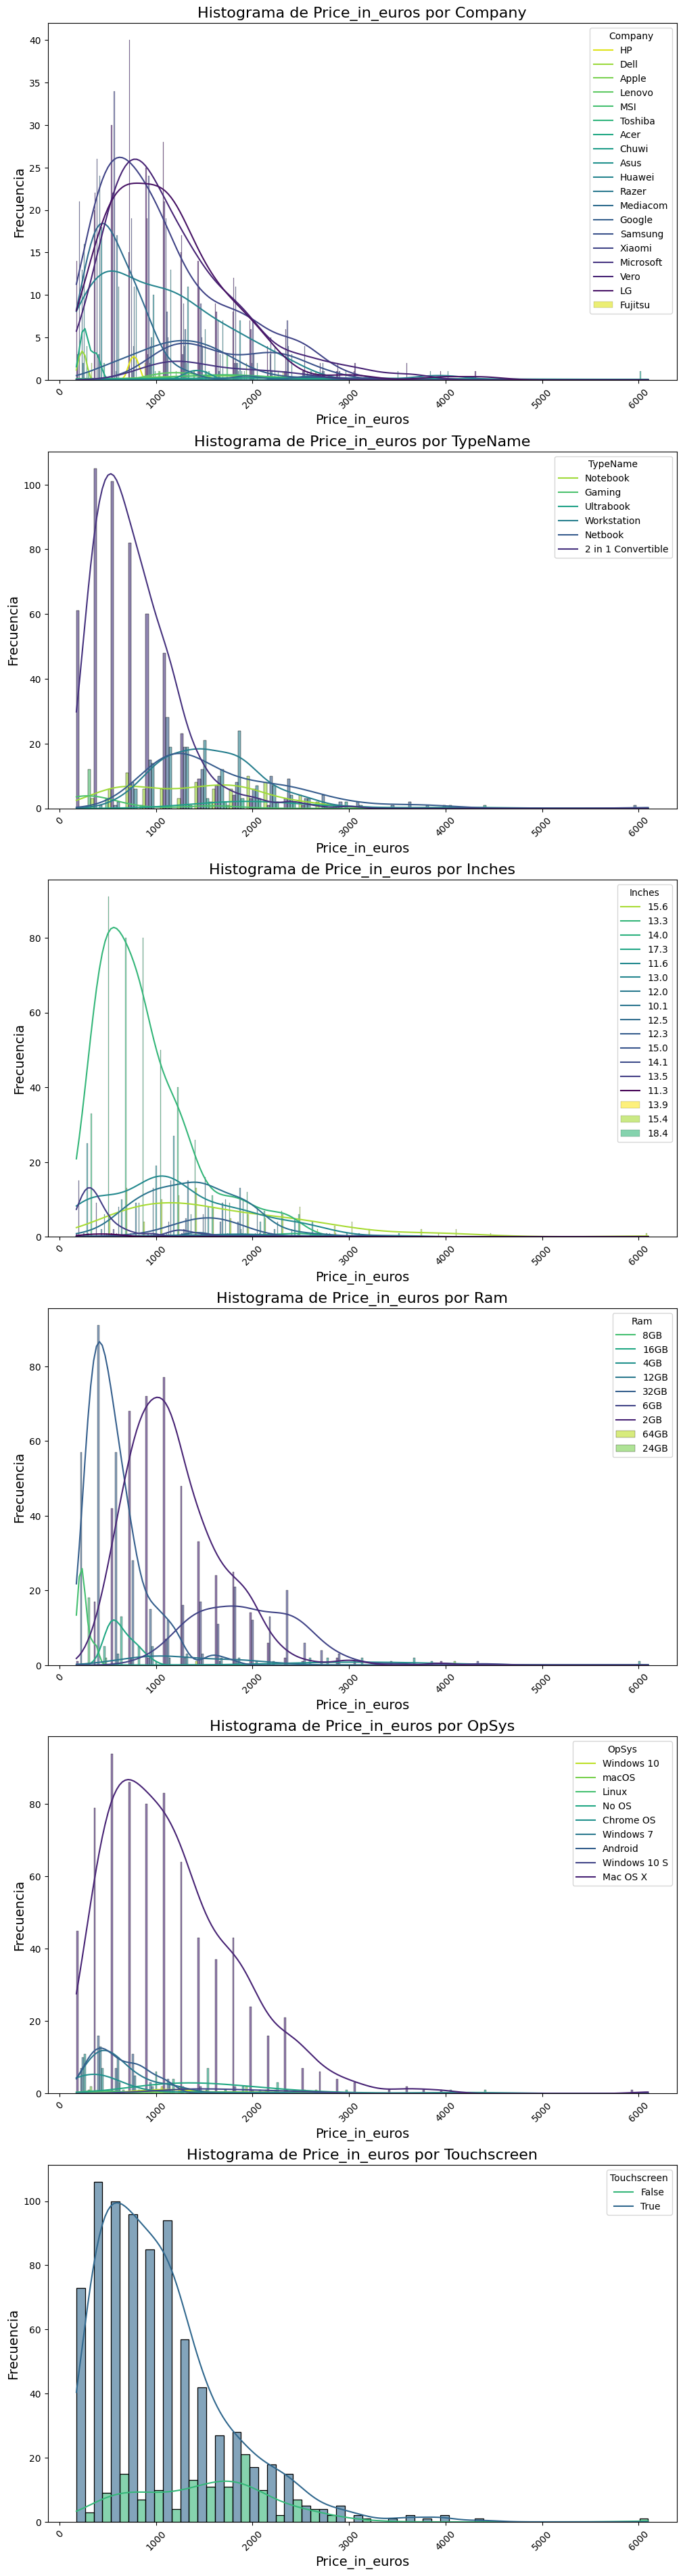

['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Touchscreen']

In [236]:
fs.plot_features_cat_regression(df, target_col="Price_in_euros", columns=['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', "Touchscreen"],pvalue=0.05)



## Procesado de datos

Nuestro target es la columna `Price_in_euros`

In [237]:
df["inches"] = df.Inches.astype(float)
df['ram_gb'] = df['Ram'].str.replace('GB', '').astype(int)
df["weight_kg"] = df['Weight'].str.replace('kg', '').astype(float)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
 12  Touchscreen       912 non-null    bool   
 13  inches            912 non-null    float64
 14  ram_gb            912 non-null    int32  
 15  weight_kg         912 non-null    float64
dtypes: bool(1), float64(4), int32(1), object(10)
me

In [239]:
target = "Price_in_euros"
features_num = df.select_dtypes(include=[np.number]).columns.tolist()
features_num.remove("Inches")
features_num.remove(target)
features_num

['inches', 'ram_gb', 'weight_kg']

<Axes: xlabel='inches', ylabel='Count'>

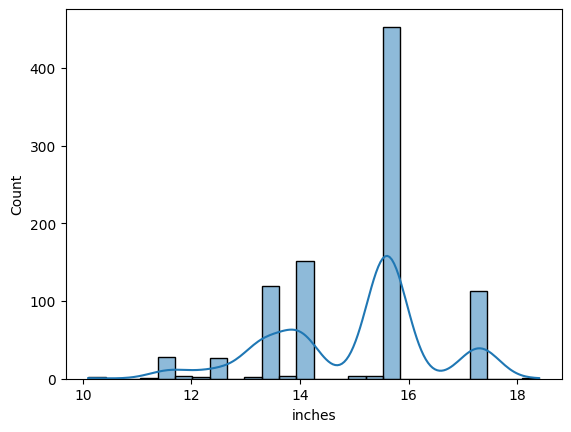

In [240]:
sns.histplot(x= "inches", data=df, kde=True) # inches es variable categorica


<Axes: xlabel='ram_gb', ylabel='Count'>

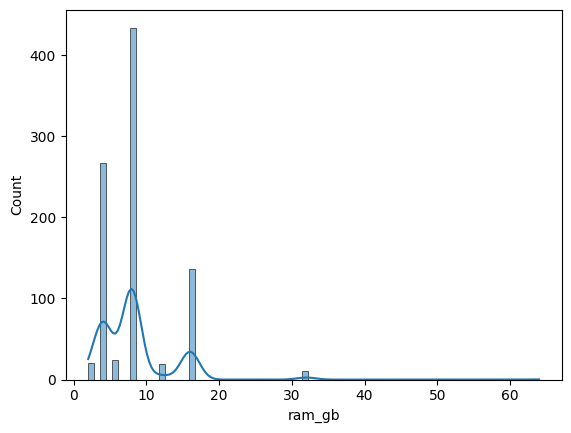

In [241]:
sns.histplot(x= "ram_gb", data=df, kde=True)

<Axes: xlabel='ram_gb', ylabel='Count'>

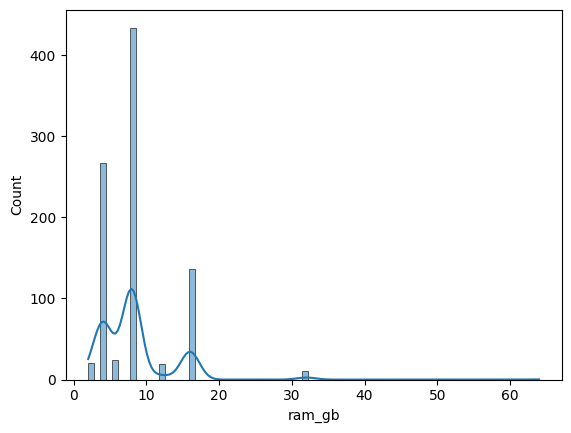

In [242]:
sns.histplot(x= "ram_gb", data=df, kde=True)

In [243]:
features_num = ["weight_kg"]

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
 12  Touchscreen       912 non-null    bool   
 13  inches            912 non-null    float64
 14  ram_gb            912 non-null    int32  
 15  weight_kg         912 non-null    float64
dtypes: bool(1), float64(4), int32(1), object(10)
me

In [245]:
features_cat = df.select_dtypes(include=[object, bool]).columns.tolist()
features_cat.remove("Ram")
features_cat.remove("Weight")
features_cat.append("inches")
features_cat.append("ram_gb")
features_cat

['Company',
 'Product',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Memory',
 'Gpu',
 'OpSys',
 'Touchscreen',
 'inches',
 'ram_gb']

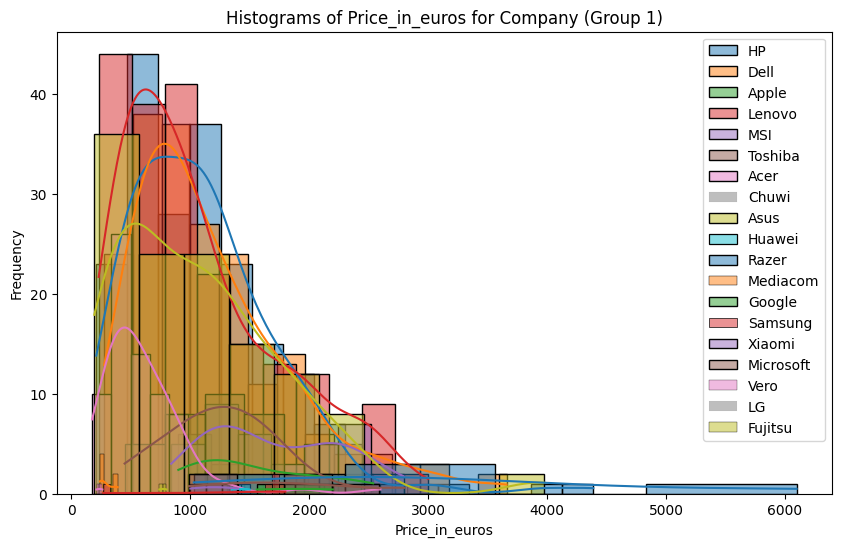

In [246]:
bt.plot_grouped_histograms(df, cat_col="Company", num_col=target, group_size=20)

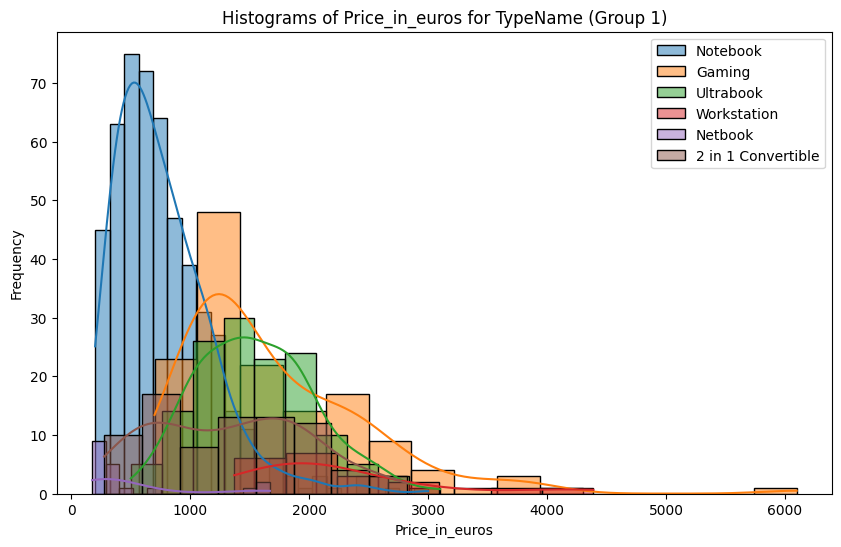

In [247]:
bt.plot_grouped_histograms(df, cat_col="TypeName", num_col=target, group_size=6)

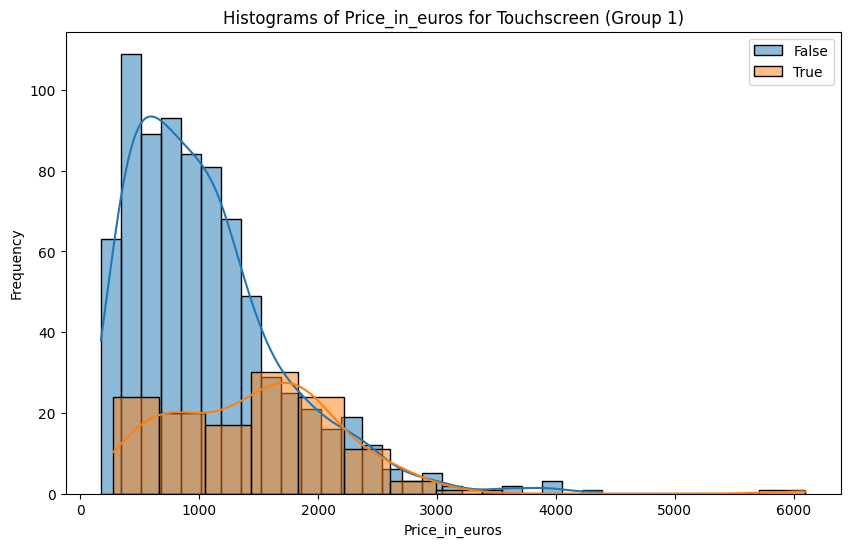

In [248]:
bt.plot_grouped_histograms(df, cat_col="Touchscreen", num_col=target, group_size=36)

In [249]:
corr = df[features_num + [target]].corr()
serie_corr = np.abs(corr[target])
serie_corr.sort_values(ascending=False)


Price_in_euros    1.000000
weight_kg         0.197086
Name: Price_in_euros, dtype: float64

-----------------------------------------------------------------------------------------------------------------

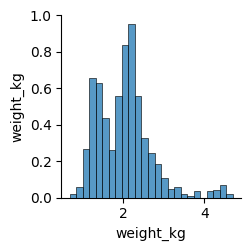

In [250]:
sns.pairplot(df[features_num])

<Axes: >

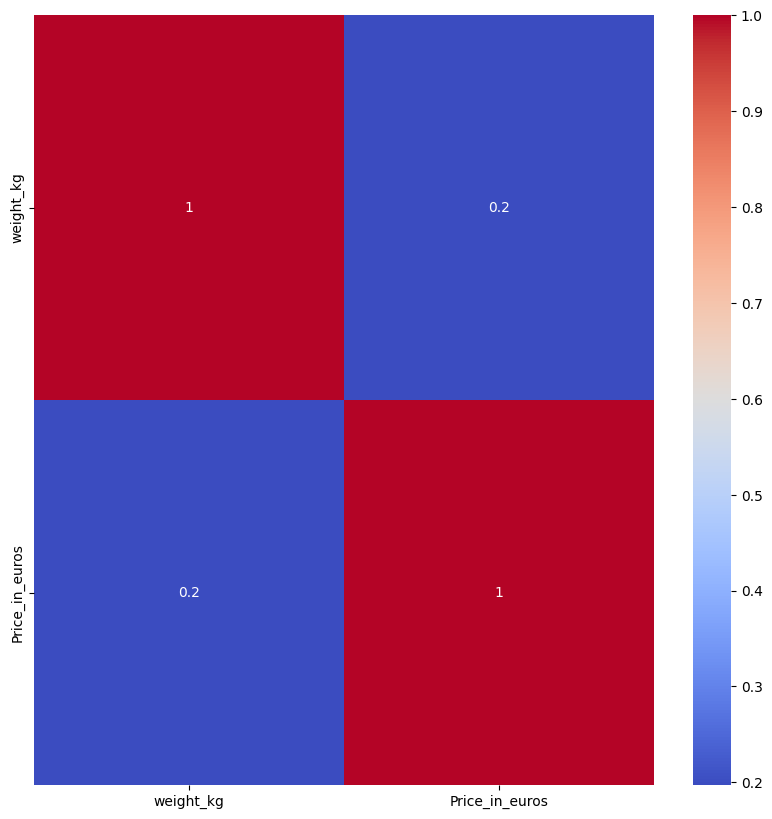

In [251]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [252]:
# Convertimos las variables categoricas en dummies:

df = pd.get_dummies(df, columns=features_cat)

In [253]:
# Escalamos las variables numericas:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[features_num] = scaler.fit_transform(df[features_num])

In [254]:
df = df.drop(columns=["Inches", "Ram", "Weight"])

In [255]:
df

,Price_in_euros,weight_kg,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,...,inches_18.4,ram_gb_2,ram_gb_4,ram_gb_6,ram_gb_8,ram_gb_12,ram_gb_16,ram_gb_24,ram_gb_32,ram_gb_64
755,539.00,-0.250996,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
618,879.01,0.846582,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
909,900.00,0.019640,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,898.94,-1.032831,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
286,428.00,0.335381,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,800.00,0.260205,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1160,1629.00,-0.822337,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
78,519.00,0.260205,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
23,258.00,-0.250996,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


## Modelado

### 1. Definir X e y

In [256]:
X = df.drop(['Price_in_euros'], axis=1)
y = df['Price_in_euros'].copy()
X.shape

(912, 772)

In [257]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Columns: 772 entries, weight_kg to ram_gb_64
dtypes: bool(771), float64(1)
memory usage: 700.9 KB


In [258]:
X.shape

(912, 772)

In [259]:
y.shape

(912,)

In [260]:
y

755      539.00
618      879.01
909      900.00
2        898.94
286      428.00
         ...   
28       800.00
1160    1629.00
78       519.00
23       258.00
229     2456.34
Name: Price_in_euros, Length: 912, dtype: float64

### 2. Dividir X_train, X_test, y_train, y_test

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [262]:
X_train

,weight_kg,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,...,inches_18.4,ram_gb_2,ram_gb_4,ram_gb_6,ram_gb_8,ram_gb_12,ram_gb_16,ram_gb_24,ram_gb_32,ram_gb_64
1118,1.463029,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
153,0.801476,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
275,-0.987726,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1100,-0.732125,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
131,1.162323,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,-0.130713,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
996,0.260205,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
770,-1.273396,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
407,0.260205,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [263]:
y_train

1118    2899.00
153     1249.26
275     1958.90
1100    1030.99
131     1396.00
         ...   
578      389.00
996      549.00
770     1859.00
407      306.00
418     1943.00
Name: Price_in_euros, Length: 729, dtype: float64

### 3. Baseline de modelos


In [271]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definir el modelo
rf = RandomForestRegressor()

# Definir los parámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', 0.5],  # Cambia 'auto' por valores válidos
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Definir GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mejores parámetros encontrados: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [272]:


RFmodel =RandomForestRegressor(random_state=42, max_depth=30, max_features="sqrt", min_samples_leaf=1, min_samples_split=2, n_estimators=300)

RFmodel.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=300,
                      random_state=42)

In [273]:
X_test

,weight_kg,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,...,inches_18.4,ram_gb_2,ram_gb_4,ram_gb_6,ram_gb_8,ram_gb_12,ram_gb_16,ram_gb_24,ram_gb_32,ram_gb_64
451,0.260205,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
802,0.079781,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
723,-0.235960,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
682,-0.596808,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1306,0.260205,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,-0.250996,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
626,-1.168149,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
416,-1.318502,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
546,-0.235960,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [274]:
y_pred = RFmodel.predict(X_test)

### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [275]:
RMSE = root_mean_squared_error(y_test, y_pred)
print(RMSE)

320.63699616406325


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [268]:
X_pred = pd.read_csv("data/test.csv", index_col=0)
X_pred.index.name = None
X_pred.head()


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [269]:
X_pred["inches"] = X_pred.Inches.astype(float)
X_pred['ram_gb'] = X_pred['Ram'].str.replace('GB', '').astype(int)
X_pred["weight_kg"] = X_pred['Weight'].str.replace('kg', '').astype(float)

In [270]:
X_pred = pd.get_dummies(X_pred, columns=features_cat)

KeyError: "['Touchscreen'] not in index"

In [ ]:
# Escalamos las variables numericas:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_pred[features_num] = scaler.fit_transform(X_pred[features_num])

In [ ]:
X_pred= X_pred.drop(columns=["Inches", "Ram", "Weight"])

In [ ]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Columns: 493 entries, inches to OpSys_macOS
dtypes: bool(490), float64(3)
memory usage: 199.3 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 451 to 260
Columns: 790 entries, inches to OpSys_macOS
dtypes: bool(787), float64(3)
memory usage: 146.4 KB


In [ ]:
# Align columns of X_pred with X_train and fill missing columns with zeros
X_pred = X_pred.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Columns: 790 entries, inches to OpSys_macOS
dtypes: bool(318), float64(3), int64(469)
memory usage: 1.5 MB


 ## 2. Replicar el procesado para ``test.csv``

In [ ]:
X_pred

,inches,ram_gb,weight_kg,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
209,0.357415,1.420931,0.502123,False,False,False,False,False,False,False,...,0,0,False,False,False,True,False,False,False,False
1281,0.357415,-0.902069,0.502123,True,False,False,False,False,False,False,...,0,0,False,True,False,False,False,False,False,False
1168,0.357415,-0.902069,-0.250117,False,False,False,False,False,False,False,...,0,0,False,False,False,True,False,False,False,False
1231,0.357415,-0.127735,0.187687,False,False,False,False,True,False,False,...,0,0,False,False,False,False,True,False,False,False
1020,-0.786899,-0.902069,-0.174893,False,False,False,False,False,False,False,...,0,0,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,1.573249,1.420931,1.254364,False,False,False,False,False,False,False,...,0,0,False,False,False,False,True,False,False,False
948,-0.786899,-0.902069,-0.897044,False,False,False,False,False,False,False,...,0,0,False,False,False,False,True,False,False,False
483,0.357415,-0.127735,-0.430655,False,False,False,False,True,False,False,...,0,0,False,False,False,False,True,False,False,False
1017,-0.786899,-0.902069,-0.641282,False,False,False,False,False,False,False,...,0,0,False,False,False,False,True,False,False,False


In [ ]:
predictions_submit = RFmodel.predict(X_pred)
predictions_submit

array([1651.1485    ,  301.484     ,  367.1289    ,  988.2652    ,
        828.4222    ,  646.8909    ,  769.2698    ,  988.9171    ,
       1464.2824    ,  361.0996    , 2302.5888    , 1514.48933333,
        604.6554    , 1508.3487    ,  696.9296    ,  615.8328    ,
       2310.1772    , 1425.1397    , 1667.1735    ,  614.1915    ,
       1671.2642    ,  373.4534    ,  721.6301    , 1419.20286667,
        520.2631    ,  745.8032    ,  611.0225    ,  553.0649    ,
       2702.1966    ,  997.7648    , 2352.5594    ,  437.1015    ,
        672.2795    , 3249.9259    , 2081.6957    , 1587.4684    ,
        592.4322    , 1512.0897    ,  880.2642    , 1545.2929    ,
        821.2882    ,  932.3082    ,  519.4741    , 1170.873     ,
       1225.8619381 , 1076.0259    ,  929.2136    ,  641.1555    ,
        700.5573    ,  430.5569    , 1879.1508    ,  731.0931    ,
       1175.7296    ,  562.6026    , 1777.0799    , 1713.9501    ,
        613.219     ,  836.1217    ,  992.4967    ,  673.8082 

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [ ]:
# ¿Qué opináis?
# ¿Sí, no?

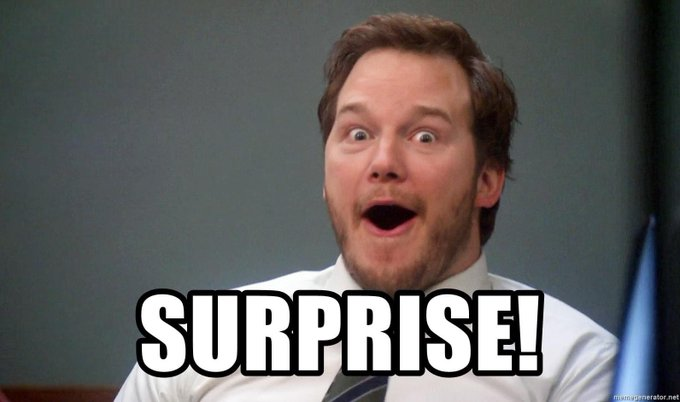

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [ ]:
sample = pd.read_csv("data/sample_submission.csv")

In [ ]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [ ]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [ ]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({"laptop_ID": X_pred.index,"Price_in_euros": predictions_submit})

In [ ]:
submission.head()

,laptop_ID,Price_in_euros
0,209,1651.1485
1,1281,301.4840
2,1168,367.1289
3,1231,988.2652
4,1020,828.4222


In [ ]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [ ]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [ ]:
chequeador(submission)

You're ready to submit!
